# Dangerous Driving Detection

**Introduction**

On average, 1.2 million people are killed per year due to road accidents, according to a report on road safety by the World Health Organization (WHO, 2015). Provinding safety awarenesss for drivers during their trips is an effective approach to prevent such accidents. To build such intelligence, the first step is to collect driving behavior data. Nowadays, instead of installing extra devices, smart phones integrated with a set of embedded sesnors have become an economical alternative for data collection. While driving, telematics data can be eaisly collected and analyzed to detect if a driver is driving dangerously and it is possible to provide feedback to the driver in real time. This project aims to use machine learning for dangerous driving detection based on telematic data. 

**Data Set**

The given dataset contains telematic data during trips with the following attributes: 
* bookingID: trip id
* accuracy: accuracy inferred by GPS (m)
* bearing: GPS bearing (degrees)
* acceleration_x/y/z: accelerometer reading at x/y/z axis (m/s2)
* gyro_x/y/z: gyroscope reading in x/y/z axis (rad/s)
* second: time of the record by number of seconds (s)
* Speed: speed measured by GPS (m/s)

and each trip has already been labeled as 1 or 0, with 1 indicating dangerous driving. 


**This notebook is submitted to Grab AI Challenge on Safety** <br>
by Bing ZHAO <br>
bing.zhao.bzh@gmail.com <br>
2019.06.17

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#User-Inputs" data-toc-modified-id="User-Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>User Inputs</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Load-and-Concatenate-Raw-Data" data-toc-modified-id="Load-and-Concatenate-Raw-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load and Concatenate Raw Data</a></span></li><li><span><a href="#Remove-Bookings-with-Multiple-Labels" data-toc-modified-id="Remove-Bookings-with-Multiple-Labels-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Remove Bookings with Multiple Labels</a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Train/Test Split</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Type-and-Statistics" data-toc-modified-id="Data-Type-and-Statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Type and Statistics</a></span></li><li><span><a href="#Box-Plot-and-Outlier-Detection" data-toc-modified-id="Box-Plot-and-Outlier-Detection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Box Plot and Outlier Detection</a></span></li></ul></li><li><span><a href="#Pre-processing-(Outlier-Removal)" data-toc-modified-id="Pre-processing-(Outlier-Removal)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pre-processing (Outlier Removal)</a></span><ul class="toc-item"><li><span><a href="#Determine-Interquantile-Range-(IQR)" data-toc-modified-id="Determine-Interquantile-Range-(IQR)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Determine Interquantile Range (IQR)</a></span></li><li><span><a href="#Filter-Outliers" data-toc-modified-id="Filter-Outliers-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Filter Outliers</a></span></li><li><span><a href="#Checking-KDE-Plots-and-Boxplots-Again" data-toc-modified-id="Checking-KDE-Plots-and-Boxplots-Again-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Checking KDE Plots and Boxplots Again</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Magnitude,-RMS-and-Orientation-of-Accerations" data-toc-modified-id="Magnitude,-RMS-and-Orientation-of-Accerations-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Magnitude, RMS and Orientation of Accerations</a></span></li><li><span><a href="#Magnitude,-RMS-and-Orientation-of-Angular-Velocity-(Gyroscope)" data-toc-modified-id="Magnitude,-RMS-and-Orientation-of-Angular-Velocity-(Gyroscope)-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Magnitude, RMS and Orientation of Angular Velocity (Gyroscope)</a></span></li></ul></li><li><span><a href="#Aggregation-per-BookingID" data-toc-modified-id="Aggregation-per-BookingID-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Aggregation per BookingID</a></span><ul class="toc-item"><li><span><a href="#Constructed-Operation-Dictionary-for-Aggregation-Function" data-toc-modified-id="Constructed-Operation-Dictionary-for-Aggregation-Function-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Constructed Operation Dictionary for Aggregation Function</a></span><ul class="toc-item"><li><span><a href="#Static-Features" data-toc-modified-id="Static-Features-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>Static Features</a></span></li><li><span><a href="#Time-Domain" data-toc-modified-id="Time-Domain-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Time Domain</a></span></li></ul></li><li><span><a href="#Frequency-Domain" data-toc-modified-id="Frequency-Domain-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Frequency Domain</a></span></li><li><span><a href="#Hjorth-Parameters" data-toc-modified-id="Hjorth-Parameters-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Hjorth Parameters</a></span></li><li><span><a href="#Record-and-remove-missing-values" data-toc-modified-id="Record-and-remove-missing-values-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Record and remove missing values</a></span></li><li><span><a href="#Construct-all-Operations" data-toc-modified-id="Construct-all-Operations-6.2.5"><span class="toc-item-num">6.2.5&nbsp;&nbsp;</span>Construct all Operations</a></span></li><li><span><a href="#Execute-Operations-per-BookingID" data-toc-modified-id="Execute-Operations-per-BookingID-6.2.6"><span class="toc-item-num">6.2.6&nbsp;&nbsp;</span>Execute Operations per BookingID</a></span></li><li><span><a href="#Convert-tuple-into-columns:-for-function-with-multiple-outputs" data-toc-modified-id="Convert-tuple-into-columns:-for-function-with-multiple-outputs-6.2.7"><span class="toc-item-num">6.2.7&nbsp;&nbsp;</span>Convert tuple into columns: for function with multiple outputs</a></span></li></ul></li><li><span><a href="#Further-Feature-Engineering" data-toc-modified-id="Further-Feature-Engineering-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Further Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Features-Require-Multiple-Columns" data-toc-modified-id="Features-Require-Multiple-Columns-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Features Require Multiple Columns</a></span></li><li><span><a href="#Merge-All-Features" data-toc-modified-id="Merge-All-Features-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Merge All Features</a></span></li><li><span><a href="#Zero-Crossings-per-Time-or-per-Distance" data-toc-modified-id="Zero-Crossings-per-Time-or-per-Distance-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Zero-Crossings per Time or per Distance</a></span><ul class="toc-item"><li><span><a href="#Remove-Outliers-of-Zero-Crossings-per-Time-or-Distance" data-toc-modified-id="Remove-Outliers-of-Zero-Crossings-per-Time-or-Distance-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>Remove Outliers of Zero-Crossings per Time or Distance</a></span></li></ul></li></ul></li><li><span><a href="#Quick-EDA-to-Check-Outliers" data-toc-modified-id="Quick-EDA-to-Check-Outliers-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Quick EDA to Check Outliers</a></span></li></ul></li><li><span><a href="#Apply-Processing-Steps-to-Test-Data" data-toc-modified-id="Apply-Processing-Steps-to-Test-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Apply Processing Steps to Test Data</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build Model</a></span><ul class="toc-item"><li><span><a href="#Merge-Train-Data-and-Label:-Maintain-Consistency" data-toc-modified-id="Merge-Train-Data-and-Label:-Maintain-Consistency-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Merge Train Data and Label: Maintain Consistency</a></span></li><li><span><a href="#Pre-processing:-Feature-Scaling-and-Imputation" data-toc-modified-id="Pre-processing:-Feature-Scaling-and-Imputation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Pre-processing: Feature Scaling and Imputation</a></span></li><li><span><a href="#Model-Selection-via-Cross-validation" data-toc-modified-id="Model-Selection-via-Cross-validation-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Model Selection via Cross-validation</a></span></li><li><span><a href="#Grid-Search-on-XGBoost" data-toc-modified-id="Grid-Search-on-XGBoost-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Grid Search on XGBoost</a></span></li><li><span><a href="#Trial-1" data-toc-modified-id="Trial-1-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Trial 1</a></span></li><li><span><a href="#Trial-2" data-toc-modified-id="Trial-2-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Trial 2</a></span></li><li><span><a href="#Trial-3" data-toc-modified-id="Trial-3-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Trial 3</a></span></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Final Model</a></span><ul class="toc-item"><li><span><a href="#Train-Final-Model-using-All-Training-Data" data-toc-modified-id="Train-Final-Model-using-All-Training-Data-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Train Final Model using All Training Data</a></span></li><li><span><a href="#Assess-the-Performance-on-Test-Data" data-toc-modified-id="Assess-the-Performance-on-Test-Data-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Assess the Performance on Test Data</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Correlation-of-Trip-Duration-and-Dangerous-Driving" data-toc-modified-id="Correlation-of-Trip-Duration-and-Dangerous-Driving-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Correlation of Trip Duration and Dangerous Driving</a></span></li><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Save Model</a></span></li></ul></li></ul></div>

## Load Libraries

In [222]:
import os
# os.chdir("../")

from utf_conversion import *
from utf_aggregation import *
from utf_utilities import *
from utf_features import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -d -t -v -p numpy,pandas,pickle,matplotlib,sklearn,xgboost


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-06-17 13:53:12 

CPython 3.6.8
IPython 7.2.0

numpy 1.16.3
pandas 0.24.0
pickle unknown
matplotlib 3.0.2
sklearn 0.20.2
xgboost 0.82


## User Inputs

In [124]:
dir_features = '../data/features/'
dir_label = '../data/labels/'
dir_model  = '../model/'
dir_outputs = '../outputs/'

## Read Data

### Load and Concatenate Raw Data

In [3]:
# read raw data
df0 = func_read_csv(dir_features, extension = '.csv')
df0.sort_values(by=['bookingID','second'], inplace=True)
df_y = func_read_csv(dir_label, extension = '.csv')
df_y.sort_values(by=['bookingID'], inplace=True)

loading 1 of 10 files: ./data/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 2 of 10 files: ./data/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 3 of 10 files: ./data/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 4 of 10 files: ./data/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 5 of 10 files: ./data/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 6 of 10 files: ./data/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 7 of 10 files: ./data/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 8 of 10 files: ./data/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 9 of 10 files: ./data/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 10 of 10 files: ./data/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv.
loading 1 of 1 files: ./data/

### Remove Bookings with Multiple Labels
It is found that there are a few duplicated bookingIDs in the label file, with the same ID labeled as both 0 and 1. Without further information, these trips are removed. 

In [71]:
ambiguous_ID = df_y[df_y[['bookingID']].duplicated()]['bookingID'].unique()
df_y = df_y[~df_y['bookingID'].isin(ambiguous_ID)]

In [72]:
# check data balance
print("{} trips in total with {:.2f}% labeled as 'dangerous'.".format(len(df_y), df_y['label'].sum()/len(df_y)*100.0))

19982 trips in total with 24.94% labeled as 'dangerous'.


### Train/Test Split

In [73]:
# stratified split into traing and test sets according to bookingID
label_name = 'label'
df_y_train, df_y_test = train_test_split(df_y, test_size = 0.20, random_state = 42, stratify=df_y[label_name])

In [258]:
# split raw data file according to bookingID
df0_train = df0[df0['bookingID'].isin(df_y_train['bookingID'].values)].copy()
df0_test = df0[df0['bookingID'].isin(df_y_test['bookingID'].values)].copy()

In [259]:
# with open(dir_outputs+'df0_train.pickle', 'wb') as handle:
#     pickle.dump(df0_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(dir_outputs+'df_y_train.pickle', 'wb') as handle:
#     pickle.dump(df_y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(dir_outputs+'df0_test.pickle', 'wb') as handle:
#     pickle.dump(df0_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open(dir_outputs+'df_y_test.pickle', 'wb') as handle:
#     pickle.dump(df_y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Exploratory Data Analysis

### Data Type and Statistics
* Total 16 million rows of numerical data without any missing entries.
* However, outliers are suspected as unphysically large values are observed as below (by both statistics and boxplots).

In [260]:
# summarize: statistics | missing value | data type | sample data
df0_train_stat = pd.concat([pd.DataFrame(df0_train.dtypes,columns=['type']), func_df_describe_all(df0_train), df0_train.head(3).T], axis=1)
func_df_display_all(df0_train_stat)

,type,count,mean,std,min,25%,50%,75%,max,miss_perc,10835302,12007854,3394723
bookingID,int64,12897741.0,8.186662e+11,4.957166e+11,0.000000,3.779571e+11,8.074539e+11,1.254130e+12,1.709397e+12,0.0,0.000000,0.000000,0.000000
Accuracy,float64,12897741.0,1.147725e+01,8.382454e+01,0.750000,3.900000e+00,4.158000e+00,8.000000e+00,6.070101e+03,0.0,12.000000,8.000000,8.000000
Bearing,float64,12897741.0,1.692116e+02,1.073034e+02,0.000000,7.800000e+01,1.690000e+02,2.630000e+02,3.599995e+02,0.0,143.298294,143.298294,143.298294
acceleration_x,float64,12897741.0,7.123137e-02,1.426857e+00,-78.419685,-5.055596e-01,6.437683e-02,6.373940e-01,6.687346e+01,0.0,0.818112,0.546405,-1.706207
acceleration_y,float64,12897741.0,4.500073e+00,8.123343e+00,-72.994119,-1.622072e+00,9.091507e+00,9.713572e+00,7.505589e+01,0.0,-9.941461,-9.835590,-9.270792
acceleration_z,float64,12897741.0,8.908811e-01,3.226880e+00,-75.936990,-9.220398e-01,7.684021e-01,2.734390e+00,7.805576e+01,0.0,-2.014999,-2.038925,-1.209448
gyro_x,float64,12897741.0,-1.772443e-03,1.427262e-01,-33.250000,-2.686891e-02,-6.713867e-04,2.325320e-02,3.983975e+01,0.0,-0.016245,-0.047092,-0.028965
gyro_y,float64,12897741.0,4.401581e-04,3.578786e-01,-74.888610,-2.983051e-02,2.792527e-04,3.145956e-02,8.031496e+01,0.0,-0.094040,-0.078874,-0.032652
gyro_z,float64,12897741.0,-1.603535e-04,1.449772e-01,-29.735018,-1.872253e-02,-3.543019e-05,1.819119e-02,6.630078e+01,0.0,0.070732,0.043187,0.015390
second,float64,12897741.0,4.607828e+03,1.606930e+06,0.000000,2.410000e+02,5.200000e+02,8.630000e+02,1.495797e+09,0.0,0.000000,1.000000,2.000000


### Box Plot and Outlier Detection

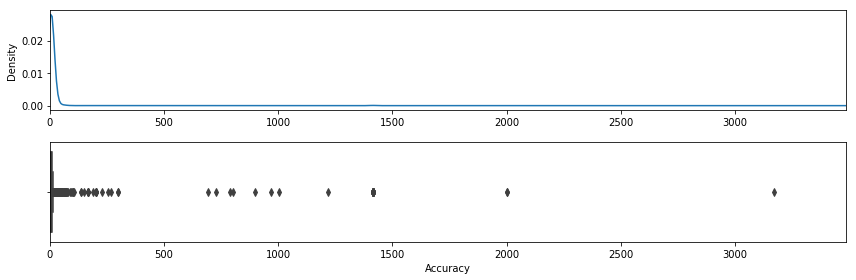

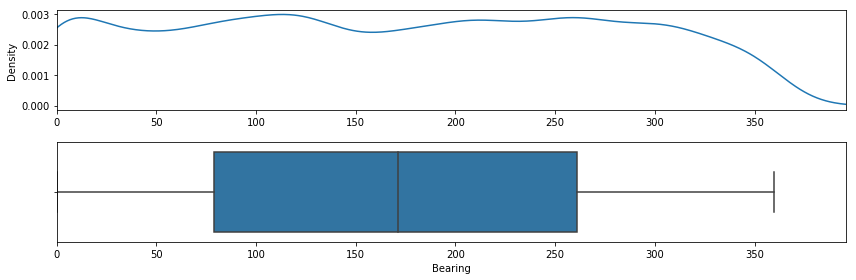

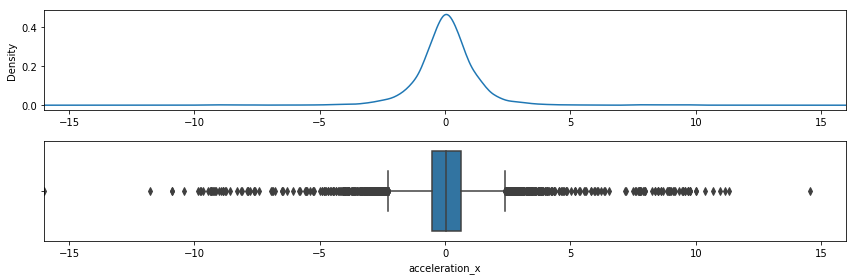

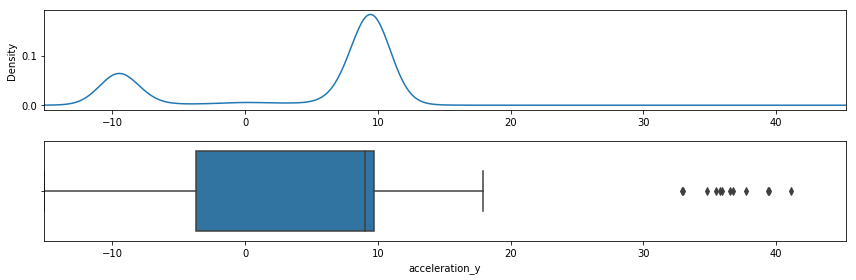

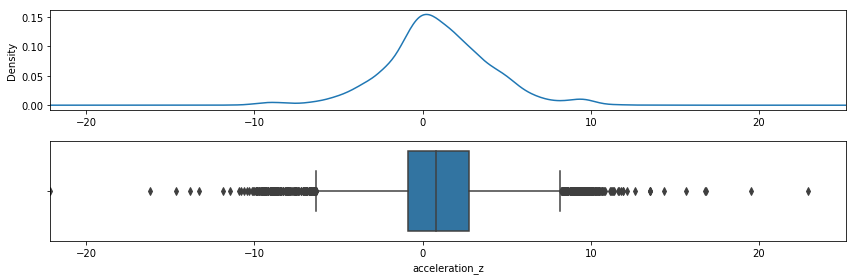

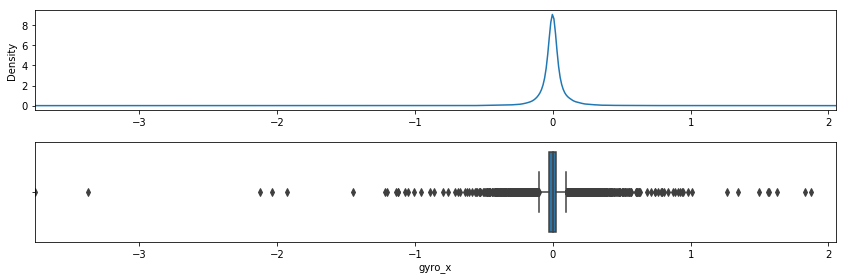

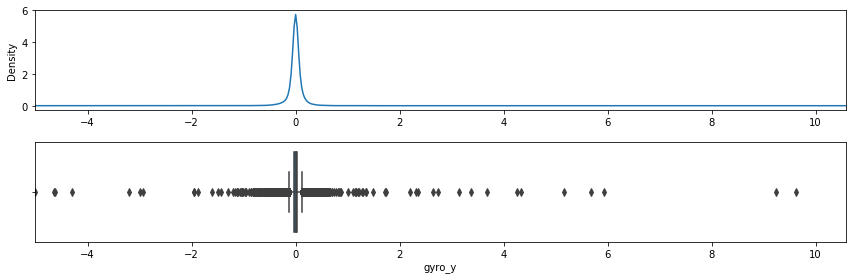

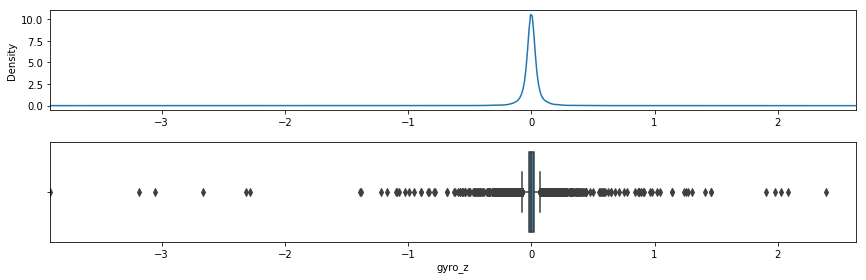

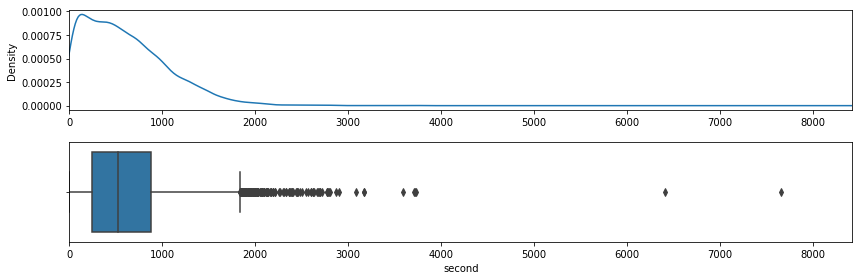

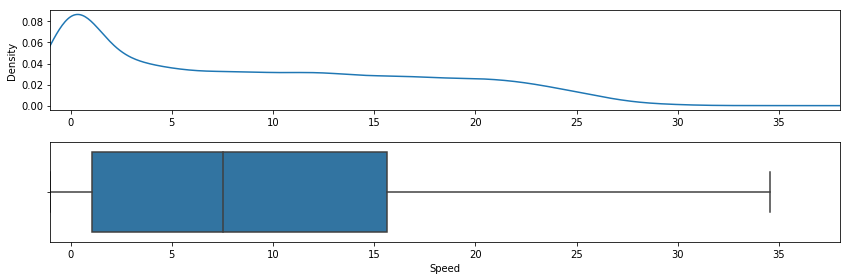

In [261]:
# updated box plots with filtered data, take sample due to large data size
func_box_plot(df0_train.sample(n=10000, random_state=42), df0_train.columns.values[1:])

## Pre-processing (Outlier Removal)
In this section, outliers are removed by IQR method. 

### Determine Interquantile Range (IQR)
The upper and lower bounds calculated based on IQR will be used for outlier filtering.

In [267]:
# calculate interquantile range (IQR) and upper and lower bounds for outlier removal
df_IQR = func_IQR(df0_train.iloc[:, 1:])  # skip 'bookingID'
df_IQR

,Q1,Q3,IQR,Lower_Bound,Upper_Bound
Accuracy,3.900000,8.000000,4.100000,-2.250000,14.150000
Bearing,78.000000,263.000000,185.000000,-199.500000,540.500000
acceleration_x,-0.505560,0.637394,1.142954,-2.219990,2.351824
acceleration_y,-1.622072,9.713572,11.335644,-18.625538,26.717039
acceleration_z,-0.922040,2.734390,3.656430,-6.406685,8.219035
gyro_x,-0.026869,0.023253,0.050122,-0.102052,0.098436
gyro_y,-0.029831,0.031460,0.061290,-0.121766,0.123395
gyro_z,-0.018723,0.018191,0.036914,-0.074093,0.073562
second,241.000000,863.000000,622.000000,-692.000000,1796.000000
Speed,1.034238,15.496599,14.462362,-20.659305,37.190142


In [268]:
with open(dir_model+'df_IQR.pickle', 'wb') as handle:
    pickle.dump(df_IQR, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Filter Outliers
Set values outside upper and lower bounds as NaN. These rows are not removed, as these outliers might be related to complicated driving environment (e.g. due to reflction or blockage of GPS signal). Thus, the number of NaN values will later be constructed and utilized as one of the features.

In [270]:
df0_train = func_filter_outlier_iqr(df0_train, df_IQR)

In [271]:
df0_train_stat = pd.concat([pd.DataFrame(df0_train.dtypes,columns=['type']), func_df_describe_all(df0_train), df0_train.head(3).T], axis=1)
func_df_display_all(df0_train_stat)

,type,count,mean,std,min,25%,50%,75%,max,miss_perc,10835302,12007854,3394723
bookingID,int64,12897741.0,8.186662e+11,4.957166e+11,0.000000,3.779571e+11,8.074539e+11,1.254130e+12,1.709397e+12,0.000000,0.000000,0.000000,0.000000
Accuracy,float64,11985451.0,5.588244e+00,2.686327e+00,0.750000,3.900000e+00,4.000000e+00,7.765000e+00,1.414974e+01,7.073254,12.000000,8.000000,8.000000
Bearing,float64,12897741.0,1.692116e+02,1.073034e+02,0.000000,7.800000e+01,1.690000e+02,2.630000e+02,3.599995e+02,0.000000,143.298294,143.298294,143.298294
acceleration_x,float64,12072528.0,6.491211e-02,8.463737e-01,-2.219986,-4.596558e-01,6.460571e-02,5.913859e-01,2.351815e+00,6.398120,0.818112,0.546405,-1.706207
acceleration_y,float64,12885268.0,4.470790e+00,8.062723e+00,-18.623380,-1.692599e+00,9.090185e+00,9.712079e+00,2.670519e+01,0.096707,-9.941461,-9.835590,-9.270792
acceleration_z,float64,12400746.0,8.508815e-01,2.688946e+00,-6.406662,-8.653656e-01,7.517793e-01,2.612074e+00,8.219009e+00,3.853349,-2.014999,-2.038925,-1.209448
gyro_x,float64,10913025.0,-1.532864e-03,3.708299e-02,-0.102052,-2.025813e-02,-6.456845e-04,1.710510e-02,9.843629e-02,15.388090,-0.016245,-0.047092,-0.028965
gyro_y,float64,10808930.0,8.125656e-04,4.537314e-02,-0.121766,-2.094395e-02,3.051758e-04,2.279663e-02,1.233946e-01,16.195169,-0.094040,-0.078874,-0.032652
gyro_z,float64,11072080.0,-1.847333e-04,2.740665e-02,-0.074093,-1.445007e-02,-2.290728e-05,1.401515e-02,7.356162e-02,14.154890,0.070732,0.043187,0.015390
second,float64,12699086.0,5.762968e+02,4.096235e+02,0.000000,2.370000e+02,5.110000e+02,8.430000e+02,1.796000e+03,1.540231,0.000000,1.000000,2.000000


### Checking KDE Plots and Boxplots Again
After removing the outliers, the distribution of all parameters appear to be in reasonable ranges.
* accelerations and gyroscope angular velocities all appear to be normally distributed with mean values at zero. 
* speed appears to be skewed towards lower velocity

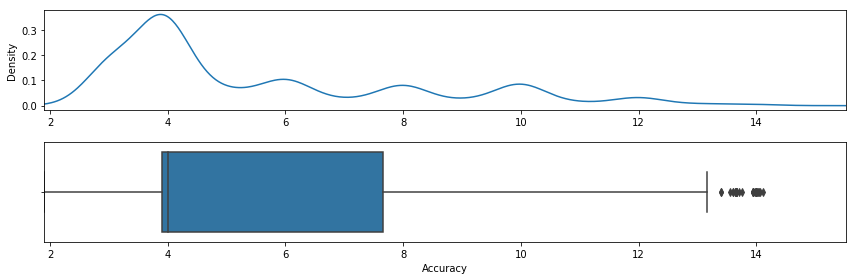

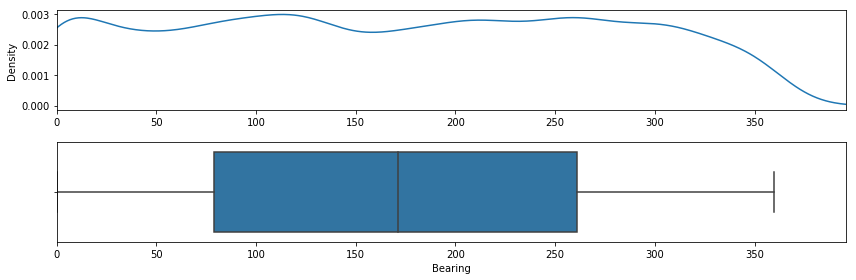

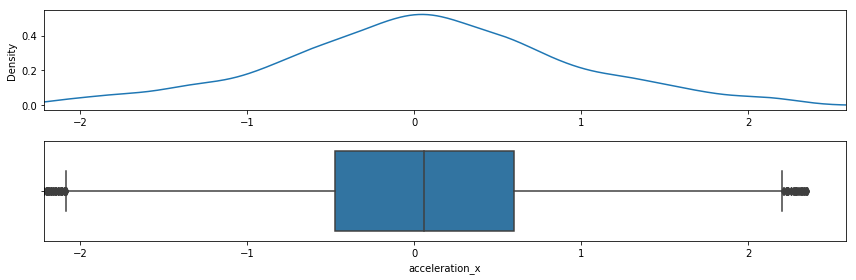

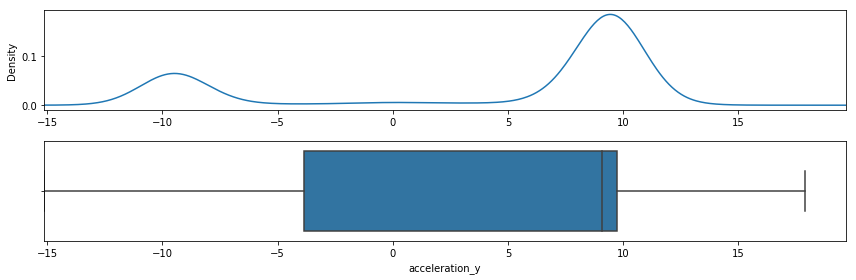

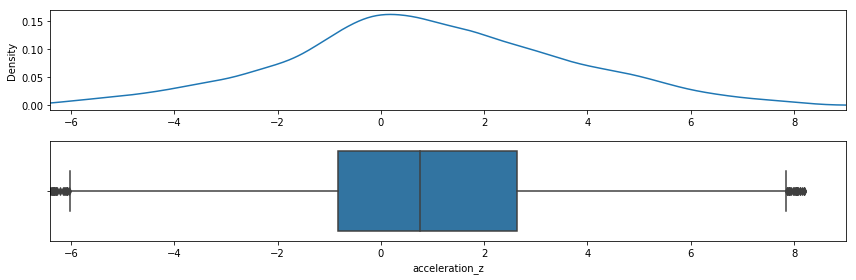

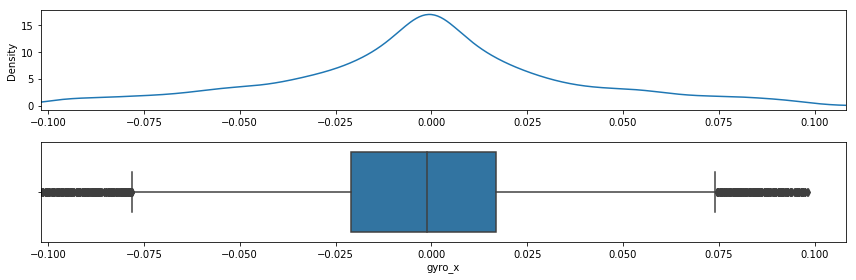

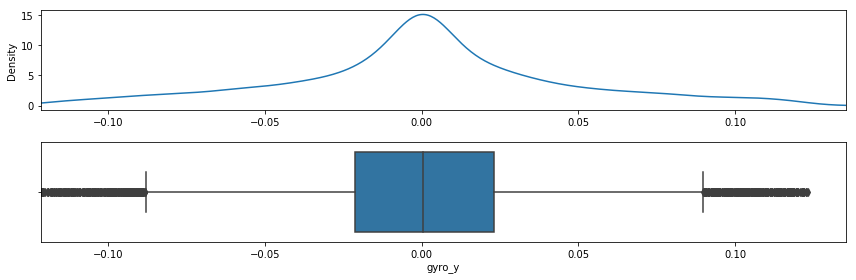

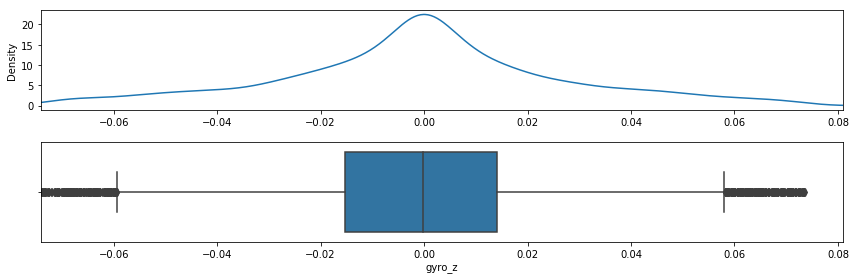

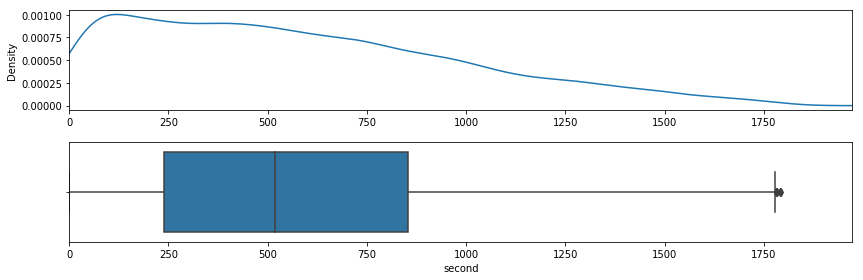

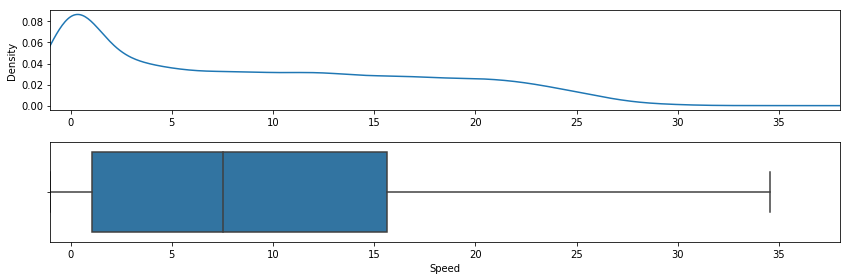

In [272]:
# updated box plots with filtered data, take sample due to large data size
func_box_plot(df0_train.sample(n=10000, random_state=42), df0_train.columns.values[1:])

## Feature Engineering

In this project, both time-domain and frequency-domain features are extracted by following the metrics utilized by Lu et al. (2018) for vehicle mode and activity type detection using accelerator data of smartphones. The features being extracted includes:
* static metrics: mean, variance, standard deviation
* time domain differences: max - min, zero-crossings, cross-correlation, peak to average ratio (PAR), signal magnitude area  (SMA), signal vector magnitude (SVM), and differential signal vector magnitude (DSVM)
* frequency domain: spectral energy, and entropy
* Hjorth parameters: activity, mobility and complexity

and each of these features reflects certain aspects of the driving behavior. In addition, extra features are created to
* record the number of invalid values filtered by the outlier removal process. As abnormal fluctuation of the GPS sensor data might indicate the vehicle has entered regions with complex road environment and thus affect the driving behavior.
* calculate the trip distance by integrating speed over time.
* calculate the number of zero-crossings of acceleration per time or distance (which indicates the frequency of acceleration or deceleration)
* calculate the number of zero-crossings of gyroscope's angular velocity per time or distance (which indicates the frequency of turning left/right or changing lanes)


**Note:**
For the given data set, the data source was not mentioned and it was not specified if the sensor orientation is fixed or alligned with vehicle's reference. For example, if the sensor data is collected by smart phone data, its local axis can vary from trip to trip. Thus, no reorientation of the sensor data is performed. 

Reference: 
Lu, D. N., Nguyen, D. N., Nguyen, T. H., & Nguyen, H. N. (2018). Vehicle mode and driving activity detection based on analyzing sensor data of smartphones. Sensors, 18(4), 1036.

### Feature Engineering

#### Magnitude, RMS and Orientation of Accerations

In [ ]:
df0_train = func_df_mag_rms_orient_a(df0_train, ['acceleration_x', 'acceleration_y', 'acceleration_z'])

#### Magnitude, RMS and Orientation of Angular Velocity (Gyroscope)

In [274]:
df0_train = func_df_mag_rms_orient_g(df0_train, ['gyro_x', 'gyro_y', 'gyro_z'])

### Aggregation per BookingID
As different aggregation methods are applied to different variables. A dictionary containing the whole set operations is first created.The aggregated features include
* Static statistics
* Time domain features
* Frequency domain features
* Hjorth Parameters
* Other misc features: e.g. number of zero-crossings per time or per distance, number of missing values, etc. 

#### Constructed Operation Dictionary for Aggregation Function

##### Static Features

In [39]:
# simply Numpy Functions: Mean, Std, Var, Median, Max-Min
features_stats_cols = ['Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 
                       'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed', 'a_rms', 'a_phi', 'a_theta', 
                       'g_rms', 'g_phi', 'g_theta']
lb_min_max = lambda x: np.nanmax(x) - np.nanmin(x)
lb_min_max.__name__="range"
features_stats_functions = [np.nanmean, np.nanstd, np.nanvar, lb_min_max]
ops_stats = {col: features_stats_functions for col in features_stats_cols}
#funct_agg_display(gp, ops_stats).T

##### Time Domain

In [40]:
# zero crossing
lb_zero_crossing = lambda x: np.nansum((x.values[~np.isnan(x.values)][:-1] * x.values[~np.isnan(x.values)][1:]) < 0)
lb_zero_crossing.__name__ = "zero_crossing"
features_zero_crossing_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
ops_zc = {col: [lb_zero_crossing] for col in features_zero_crossing_cols}
# funct_agg_display(gp, ops_zc).T

In [41]:
# Peak to Average Ratio
lb_par = lambda x: np.nanmax(x.values) / (np.nanmean(x.values) + 1e-12)
lb_par.__name__ = "par"
features_par_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 
                     'Speed', 'a_rms', 'g_rms']
ops_par = {col: [lb_par] for col in features_par_cols}
# funct_agg_display(gp, ops_par).T

In [42]:
# Signal Magnitude Vector
lb_smv_func = func_signal_mag_vector
lb_smv_func.__name__ = "smv"
ops_smv = {col: [lb_smv_func] for col in ['a_rms', 'g_rms']}
# funct_agg_display(gp, ops_smv).T

#### Frequency Domain

In [43]:
# FFT: Spectral Energy and Entropy
lb_fft_func = lambda x: func_fft_spectral_energy(x.values)
lb_fft_func.__name__ = "fft"
ops_fft = {col: [lb_fft_func] for col in ['acceleration_x', 'acceleration_y', 'acceleration_z', 'a_rms', 
                                          'gyro_x', 'gyro_y', 'gyro_z', 'g_rms']}
# funct_agg_display(gp, ops_fft).T

#### Hjorth Parameters

In [44]:
# Hjorth: (Activity, Mobility, Complexity)
lb_hjorth_func = lambda x: func_hjorth_parameters(x.values)
lb_hjorth_func.__name__ = "hjorth"
ops_hjorth = {col: [lb_hjorth_func] for col in
              ['acceleration_x', 'acceleration_y', 'acceleration_z', 'a_rms', 'a_phi', 'a_theta', 
               'gyro_x', 'gyro_y', 'gyro_z', 'g_rms', 'g_phi', 'g_theta']}
#funct_agg_display(gp, ops_hjorth).T

#### Record and remove missing values

In [45]:
# lambda function: calculate portion of missing values
features_stats_cols = ['Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 
                       'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed']
lb_nan_perc = lambda x: np.sum(np.isnan(x)) / len(x)
lb_nan_perc.__name__ = "nan_perc"
features_stats_functions = [lb_nan_perc]
ops_miss = {col: features_stats_functions for col in features_stats_cols}
#funct_agg_display(df0_train.sample(n=10000).groupby('bookingID'), ops_miss).T

#### Construct all Operations

In [46]:
# construct all the ops
ops = {}
ops_list = [
    ops_stats,
    ops_zc,
    ops_par,
    ops_smv,
    ops_fft,
    ops_hjorth,
    ops_miss]
for op in ops_list:
    for name, function_list in op.items():
        if name in ops.keys():
            ops[name].extend(function_list)
        else:
            ops.update({name: function_list.copy()})  # make sure using .copy(), otherwise, list appending dynamically

#### Execute Operations per BookingID

In [275]:
gp = df0_train.groupby('bookingID')
data_agg = gp.agg(ops)
data_agg.columns = ['_'.join(col).strip() for col in data_agg.columns.values]

C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: All-NaN axis encountered
  """
C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  
C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
C:\Users\Admin\Desktop\safety\src_baseline\utf_aggregation.py:103: RuntimeWarning: divide by zero encountered in log
  :param b: numpy array
C:\Users\Admin\Desktop\safety\src_baseline\utf_aggregation.py:103: RuntimeWarning: invalid value encountered in multiply
  :param b: numpy array


#### Convert tuple into columns: for function with multiple outputs

In [276]:
# convert tuple into columns
#(Activity, Mobility, Complexity)
for name in ops_hjorth.keys():
    old_name = name+"_hjorth"
    new_name1 = old_name + "_act"
    new_name2 = old_name + "_mob"
    new_name3 = old_name + "_com"
    data_agg[[new_name1, new_name2, new_name3]] = pd.DataFrame(data_agg[old_name].tolist(), index=data_agg.index)
    data_agg.drop(old_name, axis =1,  inplace=True)

# FFT: Spectral Energy and Entropy
for name in ops_fft.keys():
    old_name = name+"_fft"
    new_name1 = old_name + "_energy"
    new_name2 = old_name + "_entropy"
    data_agg[[new_name1, new_name2]] = pd.DataFrame(data_agg[old_name].tolist(), index=data_agg.index)
    data_agg.drop(old_name, axis =1,  inplace=True)


### Further Feature Engineering

####  Features Require Multiple Columns

In [278]:
# Trip length: Temporal Integration of Speed
data_agg_dist = gp.apply(funct_time_integral, ['Speed'])
# correlation among accelerations
data_agg_cc_a = gp.apply(funct_inter_cross_correlation, ['acceleration_x', 'acceleration_y', 'acceleration_z'])
# correlation among gyroscope's angular velocity
data_agg_cc_g = gp.apply(funct_inter_cross_correlation, ['gyro_x', 'gyro_y', 'gyro_z'])
# sma: signal mangnitude area
data_agg_sma = gp.apply(funct_sma, ['acceleration_x', 'acceleration_y', 'acceleration_z', 'a_rms', 
                                    'gyro_x', 'gyro_y', 'gyro_z', 'g_rms'])
# svm: signal vector magnitude
data_agg_svm = gp.apply(funct_dsvm, ['a_rms', 'g_rms']) 

#### Merge All Features

In [279]:
# combine single and multiple features
df_X = pd.merge(data_agg, data_agg_dist, how = "left", on="bookingID")
df_X = pd.merge(df_X, data_agg_cc_a, how = "left", on="bookingID")
df_X = pd.merge(df_X, data_agg_cc_g, how = "left", on="bookingID")
df_X = pd.merge(df_X, data_agg_sma, how = "left", on="bookingID")
df_X = pd.merge(df_X, data_agg_svm, how = "left", on="bookingID")

In [280]:
df_X.head()

,Accuracy_nanmean,Accuracy_nanstd,Accuracy_nanvar,Accuracy_range,Accuracy_nan_perc,Bearing_nanmean,Bearing_nanstd,Bearing_nanvar,Bearing_range,Bearing_nan_perc,...,acceleration_x_sma,acceleration_y_sma,acceleration_z_sma,a_rms_sma,gyro_x_sma,gyro_y_sma,gyro_z_sma,g_rms_sma,a_rms_svm,g_rms_svm
bookingID,,,,,,,,,,,,,,,,,,,,,
0,8.228947,1.588896,2.524589,8.000,0.243028,176.526099,129.231351,16700.742120,359.942302,0.0,...,0.609098,9.691405,1.787629,0.336858,0.031028,0.036419,0.021788,9.754899,0.401302,0.023045
2,3.930626,1.117354,1.248480,5.000,0.000000,173.794872,119.316520,14236.431932,353.000000,0.0,...,0.361773,9.677669,1.008786,0.156158,0.019298,0.016622,0.017016,9.775552,0.176364,0.039493
4,10.000000,0.000000,0.000000,0.000,0.000000,151.807013,71.273774,5079.950889,351.584150,0.0,...,0.491678,9.397759,2.606973,0.309653,0.028667,0.047029,0.029270,9.742806,0.459589,0.029193
7,3.681034,0.377849,0.142770,0.900,0.000000,101.562698,106.530782,11348.807510,359.000000,0.0,...,1.268268,9.388614,2.164155,0.626168,0.036518,0.038350,0.030810,9.746947,0.883760,0.030928
8,6.698374,2.716358,7.378601,10.653,0.033592,172.803618,131.848507,17384.028692,348.000000,0.0,...,1.170348,9.475994,1.747488,0.385169,0.031764,0.031258,0.011481,9.759189,0.611408,0.026912


#### Zero-Crossings per Time or per Distance
These features represent the frequency of maneuver per unit time or distance

In [26]:
col_zc = ['acceleration_x_zero_crossing', 'acceleration_y_zero_crossing', 'acceleration_z_zero_crossing',
          'gyro_x_zero_crossing', 'gyro_y_zero_crossing', 'gyro_z_zero_crossing']
col_zc_perTD = []
for c in col_zc: 
    c_t = c + 'perT'
    c_d = c + 'perD'
    df_X[c_t] = df_X[c] / (df_X['second_range'] / 60.0 + 1e-12)  # per minute
    df_X[c_d] = df_X[c] / (df_X['Speed_TimeIntegral'] + 1e-12)  # per kilometer, Speed_TimeIntegral = Trip Distance
    col_zc_perTD.append(c_t)
    col_zc_perTD.append(c_d)
df_X.head()

,Accuracy_nanmean,Accuracy_nanstd,Accuracy_nanvar,Accuracy_range,Accuracy_nan_perc,Bearing_nanmean,Bearing_nanstd,Bearing_nanvar,Bearing_range,Bearing_nan_perc,...,acceleration_y_zero_crossingperT,acceleration_y_zero_crossingperD,acceleration_z_zero_crossingperT,acceleration_z_zero_crossingperD,gyro_x_zero_crossingperT,gyro_x_zero_crossingperD,gyro_y_zero_crossingperT,gyro_y_zero_crossingperD,gyro_z_zero_crossingperT,gyro_z_zero_crossingperD
bookingID,,,,,,,,,,,,,,,,,,,,,
0,8.228947,1.588896,2.524589,8.000,0.243028,176.526099,129.231351,16700.742120,359.942302,0.0,...,0.0,0.0,4.833228,0.013706,16.651982,0.047220,14.952801,0.042401,15.254877,0.043258
2,3.930626,1.117354,1.248480,5.000,0.000000,173.794872,119.316520,14236.431932,353.000000,0.0,...,0.0,0.0,4.436364,0.084823,6.109091,0.116805,3.563636,0.068136,6.400000,0.122367
4,10.000000,0.000000,0.000000,0.000,0.000000,151.807013,71.273774,5079.950889,351.584150,0.0,...,0.0,0.0,0.219378,0.000595,12.943327,0.035083,17.330896,0.046976,23.199269,0.062882
7,3.681034,0.377849,0.142770,0.900,0.000000,101.562698,106.530782,11348.807510,359.000000,0.0,...,0.0,0.0,3.128259,0.004293,21.272158,0.029192,26.277372,0.036060,18.206465,0.024985
8,6.698374,2.716358,7.378601,10.653,0.033592,172.803618,131.848507,17384.028692,348.000000,0.0,...,0.0,0.0,2.857143,0.009925,20.129870,0.069927,20.259740,0.070378,22.077922,0.076694


##### Remove Outliers of Zero-Crossings per Time or Distance
Due to very small or zero distance or time. 

In [30]:
# calculate interquantile range (IQR) and upper and lower bounds for outlier removal
df_IQR_zc = func_IQR(df_X[col_zc_perTD])  # skip 'bookingID'
df_IQR_zc

,Q1,Q3,IQR,Lower_Bound,Upper_Bound
acceleration_x_zero_crossingperT,7.828685,17.329700,9.501015,-6.422837,31.581223
acceleration_x_zero_crossingperD,0.018220,0.041997,0.023777,-0.017446,0.077663
acceleration_y_zero_crossingperT,0.000000,0.000000,0.000000,0.000000,0.000000
acceleration_y_zero_crossingperD,0.000000,0.000000,0.000000,0.000000,0.000000
acceleration_z_zero_crossingperT,0.216411,10.480864,10.264452,-15.180267,25.877542
acceleration_z_zero_crossingperD,0.000474,0.024883,0.024410,-0.036141,0.061497
gyro_x_zero_crossingperT,16.744186,25.604113,8.859927,3.454295,38.894004
gyro_x_zero_crossingperD,0.031741,0.070993,0.039252,-0.027137,0.129872
gyro_y_zero_crossingperT,15.047985,22.216036,7.168051,4.295908,32.968112
gyro_y_zero_crossingperD,0.028312,0.061389,0.033077,-0.021303,0.111004


In [31]:
df_X[col_zc_perTD] = func_filter_outlier_iqr(df_X[col_zc_perTD], df_IQR_zc)

C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Admin\Desktop\safety\srcs\utf_utilities.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.loc[(df[index] < row['Lower_Bound']) | (df[index] > row['Upper_Bound']), index] = np.nan


In [29]:
with open(dir_model+'df_IQR_zc.pickle', 'wb') as handle:
    pickle.dump(df_IQR_zc, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
with open(dir_outputs+'df_X.pickle', 'wb') as handle:
    pickle.dump(df_X, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Quick EDA to Check Outliers
The values now appear in reasonable physical ranges. 

In [32]:
# summarize: statistics | missing value | data type | sample data
df_X_stat = pd.concat([pd.DataFrame(df_X.dtypes,columns=['type']), func_df_describe_all(df_X), df_X.head(3).T], axis=1)

In [33]:
func_df_display_all(df_X_stat)

,type,count,mean,std,min,25%,50%,75%,max,miss_perc,0,2,4
Accuracy_nanmean,float64,15892.0,5.779980,2.248925,1.629178e+00,3.969693,4.795456,7.408757,14.122000,0.581795,8.228947,3.930626,10.000000
Accuracy_nanstd,float64,15889.0,1.461745,0.833337,0.000000e+00,0.802956,1.459466,2.092728,4.637917,0.600563,1.588896,1.117354,0.000000
Accuracy_nanvar,float64,15889.0,2.831106,2.653185,0.000000e+00,0.644738,2.130040,4.379512,21.510275,0.600563,2.524589,1.248480,0.000000
Accuracy_range,float64,15892.0,7.419632,3.395095,0.000000e+00,5.000000,9.000000,10.000000,13.000000,0.581795,8.000000,5.000000,0.000000
Accuracy_nan_perc,float64,15985.0,0.074418,0.167844,0.000000e+00,0.000000,0.006000,0.052674,1.000000,0.000000,0.243028,0.000000,0.000000
Bearing_nanmean,float64,15985.0,168.539839,50.397959,0.000000e+00,131.143202,167.115523,205.960000,357.661639,0.000000,176.526099,173.794872,151.807013
Bearing_nanstd,float64,15985.0,91.237249,28.214302,0.000000e+00,72.665786,92.390301,112.153306,176.732931,0.000000,129.231351,119.316520,71.273774
Bearing_nanvar,float64,15985.0,9120.232642,4992.739166,0.000000e+00,5280.316503,8535.967686,12578.364125,31234.528782,0.000000,16700.742120,14236.431932,5079.950889
Bearing_range,float64,15985.0,335.885201,59.006003,0.000000e+00,350.000000,357.839024,359.000000,359.997920,0.000000,359.942302,353.000000,351.584150
Bearing_nan_perc,float64,15985.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Apply Processing Steps to Test Data

In [60]:
# load interquantile range for outlier removal
with open(dir_model+'df_IQR.pickle', 'rb') as handle:
    df_IQR = pickle.load(handle)
with open(dir_model+'df_IQR_zc.pickle', 'rb') as handle:
    df_IQR_zc = pickle.load(handle)
# load test data
with open(dir_outputs+'df0_test.pickle', 'rb') as handle:
    df0_test = pickle.load(handle)
with open(dir_outputs+'df_y_test.pickle', 'rb') as handle:
    df_y_test = pickle.load(handle)
df_X_test = func_processing(df0_test, df_IQR, df_IQR_zc, ops, ops_hjorth, ops_fft)

C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: All-NaN axis encountered
  """
C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: All-NaN slice encountered
  
C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [61]:
df_X_test.head()

,Accuracy_nanmean,Accuracy_nanstd,Accuracy_nanvar,Accuracy_range,Accuracy_nan_perc,Bearing_nanmean,Bearing_nanstd,Bearing_nanvar,Bearing_range,Bearing_nan_perc,...,acceleration_y_zero_crossingperT,acceleration_y_zero_crossingperD,acceleration_z_zero_crossingperT,acceleration_z_zero_crossingperD,gyro_x_zero_crossingperT,gyro_x_zero_crossingperD,gyro_y_zero_crossingperT,gyro_y_zero_crossingperD,gyro_z_zero_crossingperT,gyro_z_zero_crossingperD
bookingID,,,,,,,,,,,,,,,,,,,,,
1,3.718763,0.597933,0.357524,4.709,0.0,124.198590,89.861236,8075.041692,337.0,0.0,...,0.0,0.0,1.160542,0.002972,26.112186,0.066871,20.599613,0.052753,23.152805,0.059292
6,4.586721,1.329545,1.767691,9.000,0.0,197.812785,111.868249,12514.505138,359.0,0.0,...,0.0,0.0,1.316271,0.004740,28.190128,0.101525,23.528336,0.084736,25.831810,0.093031
10,3.815000,0.846416,0.716420,6.000,0.0,120.605333,104.260210,10870.191415,357.0,0.0,...,0.0,0.0,6.737968,0.012907,32.245989,0.061767,22.941176,0.043944,21.978610,0.042100
11,4.222360,1.049047,1.100500,5.000,0.0,140.800000,98.746202,9750.812500,350.0,0.0,...,0.0,0.0,14.849498,0.041553,16.053512,0.044922,14.849498,0.041553,18.260870,0.051099
21,4.488908,1.359831,1.849141,9.000,0.0,137.473118,100.774692,10155.538608,358.0,0.0,...,0.0,0.0,0.517241,0.001537,25.474138,0.075686,18.362069,0.054555,21.465517,0.063776


## Build Model

### Merge Train Data and Label: Maintain Consistency

In [76]:
df_Xy_train = df_X.merge(df_y_train.set_index('bookingID'), how='left', on='bookingID')
df_X_train = df_Xy_train.drop(columns=['label'])
df_y_train = df_Xy_train['label']

In [77]:
df_Xy_test = df_X_test.merge(df_y_test.set_index('bookingID'), how='left', on='bookingID')
df_X_test = df_Xy_test.drop(columns=['label'])
df_y_test = df_Xy_test['label']

In [79]:
# with open(dir_outputs+'df_Xy_train.pickle', 'wb') as handle:
#     pickle.dump(df_Xy_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open(dir_outputs+'df_Xy_test.pickle', 'wb') as handle:
#     pickle.dump(df_Xy_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Pre-processing: Feature Scaling and Imputation

In [81]:
# preprocess
# use median imputer, standard scaler
scaler_standard = StandardScaler()
imp_median = SimpleImputer(strategy='median')
df_X_train = scaler_standard.fit_transform(df_X_train)
df_X_train = imp_median.fit_transform(df_X_train)

## Impute missing values and scaling
# Scale and impute numerical features
df_X_test = scaler_standard.transform(df_X_test)
df_X_test = imp_median.transform(df_X_test)

with open(dir_model+'scaler_standard.pickle', 'wb') as handle:
    pickle.dump(scaler_standard, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(dir_model+'imp_median.pickle', 'wb') as handle:
    pickle.dump(imp_median, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Model Selection via Cross-validation
The performance of various common algorithms is compared by training the default models in sklearn. XGBoost model is selected for further fine tuning due to its balanced performance and speed. 

In [82]:
# model-selection via cross-validation
models_fitted = []
# models_fitted_names = []

import time

start = time.time()
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
models = [GaussianNB(),
          LogisticRegression(random_state=42, verbose=0, n_jobs=-1, solver='lbfgs'),
          RandomForestClassifier(n_estimators=100, random_state=42, verbose=0, n_jobs=-1),
          GradientBoostingClassifier(n_estimators=100, random_state=42, verbose=0),
          XGBClassifier(random_state=42, verbose=0, n_jobs=-1)
          ]
names = ["NaiveBayes", "Logistic", "RandomForest", "GradientBoosting", "XGBoosting"]

df_scores = pd.DataFrame()

for model, name in zip(models, names):
    print("Executing {} model.".format(name))
    start = time.time()
    scoring = {'acc': 'accuracy',
               'prec': 'precision',
               'rec': 'recall',
               'f1': 'f1',
               'roc_auc': 'roc_auc'}
    score = cross_validate(model, df_X_train, df_y_train, scoring=scoring,
                           cv=cv, return_train_score=False)
    df_score = pd.DataFrame(score)
    df_score.index = df_score.index.set_names(['cv'])
    df_score.reset_index(inplace=True)
    df_score.insert(loc=0, column='Name', value=name)
    df_scores = pd.concat([df_scores, df_score])
#     # fit the data again with all training set
#     models_fitted.append(model.fit(df_X_train, df_y_train))
#     models_fitted_names.append(name)

print("Total execution time = {} min.".format((time.time() - start) / 60.0))
df_scores.groupby('Name').agg(['mean','std']).T


Executing NaiveBayes model.
Executing Logistic model.
Executing RandomForest model.
Executing GradientBoosting model.
Executing XGBoosting model.
Total execution time = 0.38233853578567506 min.


Name               GradientBoosting  Logistic  NaiveBayes  RandomForest  \
cv           mean          2.000000  2.000000    2.000000      2.000000   
             std           1.581139  1.581139    1.581139      1.581139   
fit_time     mean         17.919225  2.412138    0.081205      3.293388   
             std           0.324970  0.282991    0.003834      0.138383   
score_time   mean          0.038202  0.018001    0.071804      0.550631   
             std           0.001096  0.009566    0.003115      0.023439   
test_acc     mean          0.783673  0.779981    0.714480      0.781420   
             std           0.004930  0.005921    0.016815      0.003862   
test_prec    mean          0.705830  0.667039    0.429326      0.720968   
             std           0.040310  0.035700    0.025702      0.029096   
test_rec     mean          0.228300  0.235574    0.423738      0.201454   
             std           0.007920  0.013891    0.036886      0.007105   
test_f1      mean          0.344838  0.348031    0.424987      0.314910   
             std           0.011218  0.018372    0.013713      0.011387   
test_roc_auc mean          0.739257  0.737977    0.675194      0.712972   
             std           0.006088  0.004012    0.016996      0.010377   

Name               XGBoosting  
cv           mean    2.000000  
             std     1.581139  
fit_time     mean    4.526659  
             std     1.074821  
score_time   mean    0.053803  
             std     0.006419  
test_acc     mean    0.783673  
             std     0.004508  
test_prec    mean    0.722215  
             std     0.038792  
test_rec     mean    0.216006  
             std     0.006560  
test_f1      mean    0.332457  
             std     0.010477  
test_roc_auc mean    0.736818  
             std     0.007203

### Grid Search on XGBoost

### Trial 1

In [164]:
# A parameter grid for XGBoost
params = {
        'learning_rate': [0.01, 0.1, 0.2], #0.01
        'min_child_weight': [1, 5, 10], # 5
        'gamma': [0, 1, 5],  # 5
        'subsample': [0.6, 0.8, 1.0], # 0.6
        'colsample_bytree': [0.6, 0.8, 1.0], # 0.6
        'max_depth': [3, 4, 5] # 3
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='binary:logistic', scale_pos_weight = 3.0,
                    silent=True, nthread=1)
folds = 5
param_comb = 150

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=-1, cv=skf.split(df_X_train, df_y_train), 
                                   verbose=2, random_state=42)

random_search.fit(df_X_train, df_y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 77.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 192.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 353.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 417.4min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000000033C686D0>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=150, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.1, 0.2], 'min_child_weight': [1, 5, 10], 'gamma': [0, 1, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [165]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0, seed=None,
       silent=True, subsample=0.6)

 Best score for 5-fold search with 150 parameter combinations:
0.739488453413867


### Trial 2
Further refine learning_rate, subsample, and colsample_bytree

In [171]:
# A parameter grid for XGBoost
params = {
        'learning_rate': [0.001, 0.01], #0.01
        'min_child_weight': [5], # 5
        'gamma': [5, 10],  # 10
        'subsample': [0.4, 0.6], # 0.4
        'colsample_bytree': [0.4, 0.6], # 0.4
        'max_depth': [3] # 3
        }
xgb = XGBClassifier(n_estimators=1000, objective='binary:logistic', scale_pos_weight = 3.0,
                    silent=True, nthread=1)
folds = 5
param_comb = 50

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=-1, cv=skf.split(df_X_train, df_y_train), 
                                   verbose=2, random_state=42)

random_search.fit(df_X_train, df_y_train)

C:\Users\Admin\Anaconda3\envs\py36-keras\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 22.1min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000000248D1678>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.001, 0.01], 'min_child_weight': [5], 'gamma': [5, 10], 'subsample': [0.4, 0.6], 'colsample_bytree': [0.4, 0.6], 'max_depth': [3]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [172]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=10, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0,
       seed=None, silent=True, subsample=0.4)

 Best score for 5-fold search with 50 parameter combinations:
0.7401172246024222


### Trial 3
Further refine n_estimators, gamma, subsamples and colsample_bytree. 

In [177]:
# A parameter grid for XGBoost
params = {
        'n_estimators': [1000, 2000],
        'learning_rate': [0.01],
        'min_child_weight': [5],
        'gamma': [10, 15, 20],
        'subsample': [0.1, 0.2, 0.4],
        'colsample_bytree': [0.1, 0.2, 0.4],
        'max_depth': [3]
        }
xgb = XGBClassifier(objective='binary:logistic', scale_pos_weight = 3.0,
                    silent=True, nthread=1)
folds = 5
param_comb = 50

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, 
                                   scoring='roc_auc', n_jobs=-1, cv=skf.split(df_X_train, df_y_train), 
                                   verbose=2, random_state=42)

random_search.fit(df_X_train, df_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 55.3min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000000002490E570>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [1000, 2000], 'learning_rate': [0.01], 'min_child_weight': [5], 'gamma': [10, 15, 20], 'subsample': [0.1, 0.2, 0.4], 'colsample_bytree': [0.1, 0.2, 0.4], 'max_depth': [3]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [178]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=15, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0,
       seed=None, silent=True, subsample=0.4)

 Best score for 5-fold search with 50 parameter combinations:
0.740179807979094


## Final Model

Here, the best model so far from grid search Trial 3 is adopted as the final model with a training ROC-AUC of 0.740. It is to be shown that the ROC-AUC based on test data is 0.733.

### Train Final Model using All Training Data

In [179]:
clf_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=15, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0,
       seed=None, silent=True, subsample=0.4)
clf_xgb.fit(df_X_train, df_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=15, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3.0,
       seed=None, silent=True, subsample=0.4)

### Assess the Performance on Test Data

In [180]:
y_pred_test = clf_xgb.predict(df_X_test)
print("Test accuracy = {:.6f}".format(accuracy_score(df_y_test, y_pred_test)))

unique_label = np.unique(df_y_test)
cm = confusion_matrix(df_y_test, y_pred_test, labels=unique_label)
print(pd.DataFrame(cm, 
                   index=['true:{:}'.format(x) for x in unique_label],
                   columns=['pred:{:}'.format(x) for x in unique_label]))

cr = classification_report(df_y_test, y_pred_test, output_dict=True)
cr_df = pd.DataFrame(cr)
display(cr_df)

Test accuracy = 0.678509
        pred:0  pred:1
true:0    2099     901
true:1     384     613


,0,1,micro avg,macro avg,weighted avg
f1-score,0.765639,0.488252,0.678509,0.626945,0.696449
precision,0.845348,0.404888,0.678509,0.625118,0.735481
recall,0.699667,0.614845,0.678509,0.657256,0.678509
support,3000.000000,997.000000,3997.000000,3997.000000,3997.000000


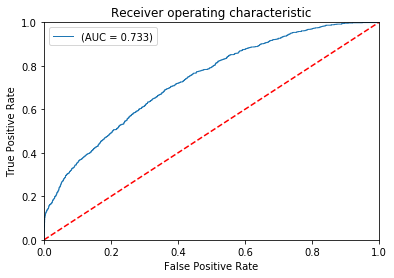

In [181]:
from sklearn.metrics import roc_curve, auc
probas_ = clf_xgb.predict_proba(df_X_test)
fpr, tpr, thresholds = roc_curve(df_y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1.0, label='(AUC = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

### Feature Importance

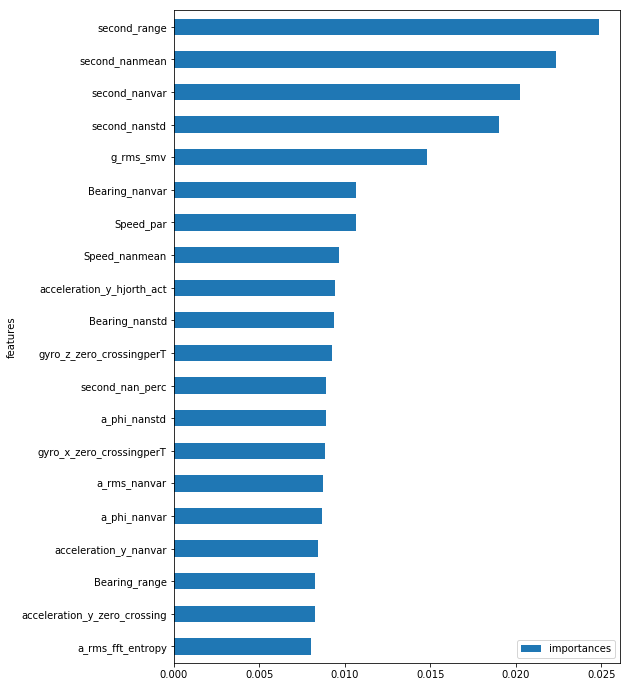

In [209]:
df_fi = pd.DataFrame()
df_fi['features'] = df_Xy_train.columns.values[:-1]
df_fi['importances'] = clf_xgb.feature_importances_
df_fi.sort_values(by='importances',ascending=False,inplace=True)
topK = 20
df_fi[:topK].plot.barh(x='features', y='importances',figsize=(8,12))
plt.gca().invert_yaxis()
plt.show()

### Correlation of Trip Duration and Dangerous Driving
The feature importance suggests that trip duration (*second*) is the most determining factor for classifying dangerous driving, followed by gyroscope's angular velocity and bearing. 

To further understand the correlation, the distributions of a few selected features are examined by plotting the kernel density plot (i.e. histogram) colored by the correponding label (0 or 1). It can be observed that a trip has a higher probability to be 'dangerous' with 
* longer trip duration: maybe due to fatigue driving
* more turning: due to complex route
* higher speed


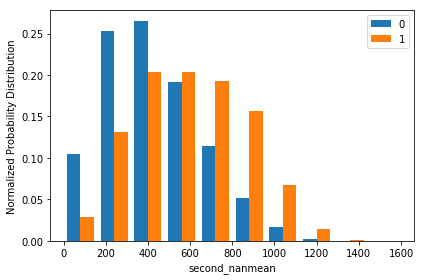

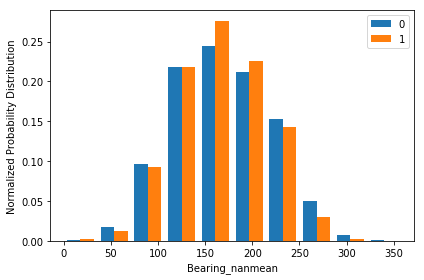

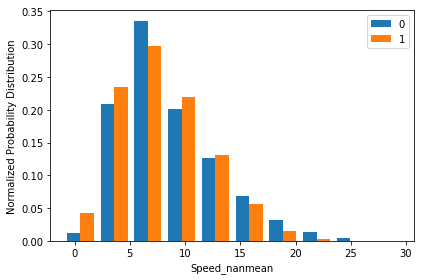

In [221]:
def func_eda_hist_by_label_plot(df_X, Y, normal=False, figsize=(6,4)):
    """function to plot the normalized probability density distribution colored by label
    Keyword arguments: df_X (feature dataframe), y (label pandas series), normal(density plot), dir_png (output dir); Return: PNG files
    """

    y_uniques = Y.unique()  # unique labels, e.g. 0 or 1

    for col in df_X.columns:
        # filter nan vales
        mask = ~df_X[col].isnull()
        x = df_X.loc[mask, col]
        y = Y[mask]

        # plot
        fig = plt.figure(figsize=figsize)
        plt.hist([x[y == y_unique] for y_unique in y_uniques],
                 label=y_uniques,
                 weights=[np.ones(x[y == y_unique].count()) / x[y == y_unique].count() for y_unique in y_uniques])#density=True)
        plt.xlabel(col)
        plt.ylabel('Normalized Probability Distribution')
        plt.legend()
        plt.tight_layout()
        plt.show()

features_to_plot = ['second_nanmean', 'Bearing_nanmean', 'Speed_nanmean']
func_eda_hist_by_label_plot(df_Xy_train[features_to_plot], df_Xy_train['label'], normal=False)

### Save Model

In [182]:
with open(dir_model+'clf_xgb.pickle', 'wb') as handle:
    pickle.dump(clf_xgb, handle, protocol=pickle.HIGHEST_PROTOCOL)

**END**